In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import json

In [2]:
tracts = json.load(open('/Users/shariqiqbal/data/data4good/tracts.json'))

In [3]:
df = pd.read_csv('/Users/shariqiqbal/data/data4good/ACS_13_5YR_S2201/ACS_13_5YR_S2201_with_ann.csv')

In [4]:
for col in df.columns:
    if 'MOE' in col:
        df = df.drop(col, axis=1)
if 'GEO.id' in df.columns:
    df = df.drop('GEO.id', axis=1)
desc = df.iloc[0]
df = df.drop(0)
df[df == '-'] = np.nan

In [5]:
i=0
for column in df.columns:
    print column, ':         ', desc[i]
    i+=1

GEO.id2 :          Id2
GEO.display-label :          Geography
HC01_EST_VC01 :          Total; Estimate; Households
HC02_EST_VC01 :          Households receiving food stamps; Estimate; Households
HC03_EST_VC01 :          Households not receiving food stamps; Estimate; Households
HC01_EST_VC02 :          Total; Estimate; With one or more people 60 years and over
HC02_EST_VC02 :          Households receiving food stamps; Estimate; With one or more people 60 years and over
HC03_EST_VC02 :          Households not receiving food stamps; Estimate; With one or more people 60 years and over
HC01_EST_VC03 :          Total; Estimate; With children under 18 years
HC02_EST_VC03 :          Households receiving food stamps; Estimate; With children under 18 years
HC03_EST_VC03 :          Households not receiving food stamps; Estimate; With children under 18 years
HC01_EST_VC06 :          Total; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Below poverty level
HC02_EST_VC06 :          Households rec

In [6]:
df['prop_stamps'] = df.HC02_EST_VC01.values.astype(np.float) / df.HC01_EST_VC01.values.astype(np.float)

In [7]:
id_to_loc = {entry['properties']['GEOID']: (np.float(entry['properties']['INTPTLAT']), np.float(entry['properties']['INTPTLON'])) for entry in tracts['features']}

In [8]:
df['location'] = df['GEO.id2'].map(id_to_loc)

In [9]:
df2 = pd.read_csv('/Users/shariqiqbal/data/data4good/pantries.csv')

In [10]:
closest = np.zeros(len(df))
for census_row in df.iterrows():
    tract_loc = census_row[1].location
    min_dist = np.inf
    for pantries_row in df2.iterrows():
        pantry_loc = (pantries_row[1].lat, pantries_row[1].lon)
        curr_dist = (tract_loc[0] - pantry_loc[0])**2 + (tract_loc[1] - pantry_loc[1])**2
        if curr_dist < min_dist:
            min_dist = curr_dist
    closest[census_row[0]-1] = min_dist

In [11]:
df['closest_pantry'] = closest

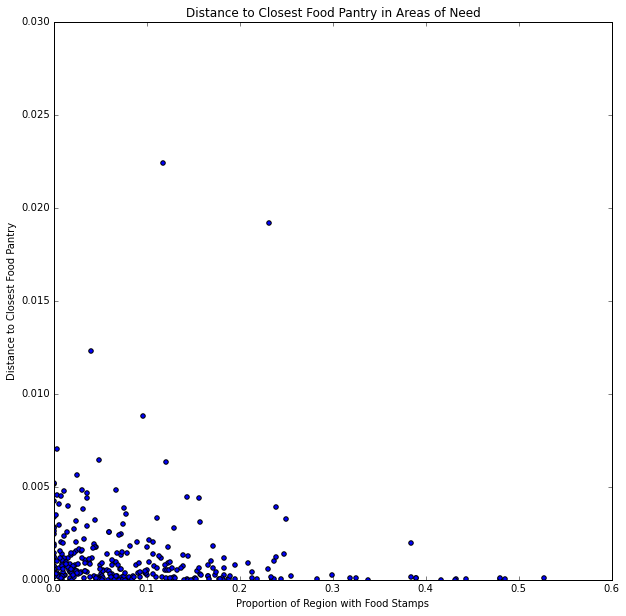

In [31]:
plt.figure(figsize=(10,10))

plt.title("Distance to Closest Food Pantry in Areas of Need")
plt.ylabel("Distance to Closest Food Pantry")
plt.xlabel("Proportion of Region with Food Stamps")
plt.xlim(0, 0.6)
plt.ylim(0, 0.030)
plt.scatter(df.prop_stamps.values, df.closest_pantry.values);

In [14]:
df[df.closest_pantry>0.015]

,GEO.id2,GEO.display-label,HC01_EST_VC01,HC02_EST_VC01,HC03_EST_VC01,HC01_EST_VC02,HC02_EST_VC02,HC03_EST_VC02,HC01_EST_VC03,HC02_EST_VC03,...,HC03_EST_VC30,HC01_EST_VC31,HC02_EST_VC31,HC03_EST_VC31,HC01_EST_VC34,HC02_EST_VC34,HC03_EST_VC34,prop_stamps,location,closest_pantry
81,37101041300,"Census Tract 413, Johnston County, North Carolina",2065,479,1586,33.1,24.8,35.6,42.0,57.2,...,31.2,52.5,39.1,56.6,1.5,(X),(X),0.231961,"(35.3286198, -78.3557665)",0.019181
99,37135011203,"Census Tract 112.03, Orange County, North Caro...",2321,272,2049,34.8,16.5,37.2,30.5,53.3,...,23.8,52.3,14.2,57.1,0.6,(X),(X),0.117191,"(35.9438185, -79.2194717)",0.022391


In [23]:
df[(df.closest_pantry>0.001) & (df.prop_stamps>0.3)]

,GEO.id2,GEO.display-label,HC01_EST_VC01,HC02_EST_VC01,HC03_EST_VC01,HC01_EST_VC02,HC02_EST_VC02,HC03_EST_VC02,HC01_EST_VC03,HC02_EST_VC03,...,HC03_EST_VC30,HC01_EST_VC31,HC02_EST_VC31,HC03_EST_VC31,HC01_EST_VC34,HC02_EST_VC34,HC03_EST_VC34,prop_stamps,location,closest_pantry
65,37101040301,"Census Tract 403.01, Johnston County, North Ca...",1529,588,941,43.0,33.7,48.9,31.7,50.5,...,33.4,36.2,9.4,53.0,2.7,(X),(X),0.384565,"(35.5607778, -78.2486071)",0.001953
